1.run up untill model trainning, upload data.
make file called pre_trained_models and move model downloaded into there
2.in the models folder, open a model folder <-some_mode->/v1 and copy pipeline from pre_trained_models.config the following:
fine_tune_checkpoint_type: "detection"
batch_size=even number, low

fine_tune_checkpoint: "/content/pre_trained_models/ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/checkpoint/ckpt-0"
  fine_tune_checkpoint_type: "detection"
}
train_input_reader {
  label_map_path: "/content/data/label_map.txt"
  tf_record_input_reader {
    input_path: "/content/data/train.record/trainAnno.tfrecord"
  }
}
eval_config {
  metrics_set: "coco_detection_metrics"
  use_moving_averages: false
}
eval_input_reader {
  label_map_path: "/content/data/label_map.txt"
  tf_record_input_reader {
    input_path: "/content/data/validation.record/trainAnno.tfrecord"
  }
}

add a txt file into data file called label_map.txt and write 
item {
	id: 1
	name: "fire"
}

item {
	id: 2
	name: "natural"
}


upload mode_main_tf2.py
and 
exporter_main_v2.py
from object_detection from models file i think
run command 
python model_main_tf2.py --pipeline_config_path=.\models\ssd_mobilenet_v1\v1\pipeline.config --model_dir=.\models\ssd_mobilenet_v1\v1 --checkpoint_every_n=5 --num_workers=1 --alsologtostderr

for trainning
make folder "exported_models" and make another folder with same name as model
and run 

python exporter_main_v2.py --pipeline_config_path=.\models\faster_rcnn_inception_resnet_v2\v1\pipeline.config --trained_checkpoint_dir=.\models\faster_rcnn_inception_resnet_v2\v1 --output_directory=C:\Tensorflow\workspace\exported_models\faster_rcnn_inception_resnet_v2 --input_type=image_tensor

for eval,

then upload juypter notebook and try it out 


NEXT WE WOULD LIKE TO DOWNLOAD THE MODEL AND RUN WEBCAM TO DETECT FIRE



In [ ]:
import shutil

shutil.rmtree('/content/sample_data')

In [ ]:
!gdown http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8.tar.gz

In [ ]:
mkdir workspace

In [ ]:
cd workspace

In [ ]:
mkdir exported_models

In [ ]:
cd exported_models

In [ ]:
mkdir ssd_mobilenet_v2_fpnlite

In [ ]:
cd ..

In [ ]:
mkdir pre_trained_models

In [ ]:
mkdir models

In [ ]:
cd models


In [ ]:
mkdir ssd_mobilenet_v2_fpnlite

In [ ]:
cd ssd_mobilenet_v2_fpnlite

In [ ]:
mkdir v1

In [ ]:
cd /content

In [ ]:
#!tar -z ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8.tar.gz
!tar -xzvf "ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8.tar.gz" -C "/content/workspace/pre_trained_models"     #[run this cell to extract tar.gz files]

# Upload data rfrecord files

In [ ]:
cd /content

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

In [ ]:
cp /content/gdrive/MyDrive/data.zip /content/

In [ ]:
cp /content/gdrive/MyDrive/exporter_main_v2.py /content/workspace

In [ ]:
cp /content/gdrive/MyDrive/model_main_tf2.py /content/workspace

In [ ]:
cp /content/gdrive/MyDrive/pipeline.config /content/workspace/models/ssd_mobilenet_v2_fpnlite/v1

In [ ]:
!unzip data.zip -d /content/workspace 

In [ ]:
!pip install lvis

In [ ]:
!apt-get install protobuf-compiler python-pil python-lxml python-tk
!pip install Cython tf_slim
!git clone https://github.com/tensorflow/models.git
%cd /content/models/research
!protoc object_detection/protos/*.proto --python_out=.
%set_env PYTHONPATH=/content/models/research:/content/models/research/slim
import os
os.environ['PYTHONPATH'] += ":/content/models"
import sys
sys.path.append("/content/models")
!python object_detection/builders/model_builder_test.py

In [ ]:
pip install tensorflow-addons

In [ ]:
import multiprocessing

cores = multiprocessing.cpu_count() # Count the number of cores in a computer
cores

In [ ]:
!export CUDA_VISIBLE_DEVICES=0,1

# We have model we trained before that we're going to use with better configs

In [ ]:
cp /content/gdrive/MyDrive/mode_v1.zip /content/

In [ ]:
cd /content/

In [ ]:
!unzip mode_v1.zip -d /content/workspace/models/ssd_mobilenet_v2_fpnlite/v1

In [ ]:
cd /content/workspace

In [5]:
# Train model

In [ ]:
!python model_main_tf2.py --pipeline_config_path=/content/workspace/models/ssd_mobilenet_v2_fpnlite/v1/pipeline.config --model_dir=/content/workspace/models/ssd_mobilenet_v2_fpnlite/v1 --checkpoint_every_n=5 --num_workers=2 --alsologtostderr


In [ ]:
# Export trained model

In [ ]:
!python exporter_main_v2.py --pipeline_config_path=/content/workspace/models/ssd_mobilenet_v2_fpnlite/v1/pipeline.config --trained_checkpoint_dir=/content/workspace/models/ssd_mobilenet_v2_fpnlite/v1 --output_directory=/content/workspace/exported_models/ssd_mobilenet_v2_fpnlite --input_type=image_tensor

In [10]:
# Validation model

In [11]:
!python model_main_tf2.py --pipeline_config_path=/content/workspace/models/ssd_mobilenet_v2_fpnlite/v1/pipeline.config --model_dir=/content/workspace/models/ssd_mobilenet_v2_fpnlite/v1/ --checkpoint_dir=/content/workspace/models/ssd_mobilenet_v2_fpnlite/v1/ --num_workers=2 --sample_1_of_n_eval_examples=1

SyntaxError: invalid syntax (<ipython-input-11-9e76a7cc4a42>, line 1)

In [12]:
!pip install tensorboard

In [19]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [20]:
import tensorflow as tf
import datetime, os

In [21]:
%tensorboard --logdir='C:/Users/Mosa-T/Desktop/content/workspace/models/ssd_mobilenet_v2_fpnlite/'

Reusing TensorBoard on port 6006 (pid 10460), started 1:20:27 ago. (Use '!kill 10460' to kill it.)

In [ ]:
tensorboard dev upload --logdir 'logs'

Launching TensorBoard...

# testing model

In [ ]:
!pip install tensorflow
!pip install tqdm
!pip install tf_slim
!pip install scipy
!pip install tf-models-official

In [17]:
import os # importing OS in order to make GPU visible
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID" # do not change anything in here

# specify which device you want to work on.
# Use "-1" to work on a CPU. Default value "0" stands for the 1st GPU that will be used
os.environ["CUDA_VISIBLE_DEVICES"]="0" # TODO: specify your computational device

In [18]:
import tensorflow as tf # import tensorflow

# checking that GPU is found
if tf.test.gpu_device_name():
    print('GPU found')
else:
    print("No GPU found")

No GPU found


In [34]:
# other import
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
%matplotlib inline
from tqdm import tqdm

In [20]:
import sys # importyng sys in order to access scripts located in a different folder

path2scripts = './models/research/' # TODO: provide pass to the research folder
sys.path.insert(0, path2scripts) # making scripts in models/research available for import

In [21]:
# importing all scripts that will be needed to export your model and use it for inference
from object_detection.utils import label_map_util
from object_detection.utils import config_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder

In [22]:
# NOTE: your current working directory should be Tensorflow.

# TODO: specify two pathes: to the pipeline.config file and to the folder with trained model.
path2config ='C:/Users/Mosa-T/Desktop/content/workspace/exported_models/ssd_mobilenet_v2_fpnlite/pipeline.config'
path2model = 'C:/Users/Mosa-T/Desktop/content/workspace/exported_models/ssd_mobilenet_v2_fpnlite/checkpoint'

In [23]:
# do not change anything in this cell
configs = config_util.get_configs_from_pipeline_file(path2config) # importing config
model_config = configs['model'] # recreating model config
detection_model = model_builder.build(model_config=model_config, is_training=False) # importing model

In [24]:
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(path2model, 'ckpt-0')).expect_partial()

In [25]:
path2label_map = 'C:/Users/Mosa-T/Desktop/content/workspace/data/label_map.txt' # TODO: provide a path to the label map file
category_index = label_map_util.create_category_index_from_labelmap(path2label_map,use_display_name=True)

In [26]:
def detect_fn(image):
    """
    Detect objects in image.
    
    Args:
      image: (tf.tensor): 4D input image
      
    Returs:
      detections (dict): predictions that model made
    """
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)

    return detections

In [27]:
def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.

    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.

    Args:
      path: the file path to the image

    Returns:
      numpy array with shape (img_height, img_width, 3)
    """
    
    return np.array(Image.open(path))

In [28]:
def inference_with_plot(path2images, box_th=0.25):
    """
    Function that performs inference and plots resulting b-boxes
    
    Args:
      path2images: an array with pathes to images
      box_th: (float) value that defines threshold for model prediction.
      
    Returns:
      None
    """
    for image_path in path2images:

        print('Running inference for {}... '.format(image_path), end='')

        image_np = load_image_into_numpy_array(image_path)
        
        input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
        detections = detect_fn(input_tensor)

        # All outputs are batches tensors.
        # Convert to numpy arrays, and take index [0] to remove the batch dimension.
        # We're only interested in the first num_detections.
        num_detections = int(detections.pop('num_detections'))
        detections = {key: value[0, :num_detections].numpy()
                      for key, value in detections.items()}
        
        detections['num_detections'] = num_detections

        # detection_classes should be ints.
        detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

        label_id_offset = 1
        image_np_with_detections = image_np.copy()

        viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=200,
                min_score_thresh=box_th,
                agnostic_mode=False,
                line_thickness=5)

        plt.figure(figsize=(15,10))
        plt.imshow(image_np_with_detections)
        print('Done')
    plt.show();

In [29]:
def nms(rects, thd=0.5):
    """
    Filter rectangles
    rects is array of oblects ([x1,y1,x2,y2], confidence, class)
    thd - intersection threshold (intersection divides min square of rectange)
    """
    out = []

    remove = [False] * len(rects)

    for i in range(0, len(rects) - 1):
        if remove[i]:
            continue
        inter = [0.0] * len(rects)
        for j in range(i, len(rects)):
            if remove[j]:
                continue
            inter[j] = intersection(rects[i][0], rects[j][0]) / min(square(rects[i][0]), square(rects[j][0]))

        max_prob = 0.0
        max_idx = 0
        for k in range(i, len(rects)):
            if inter[k] >= thd:
                if rects[k][1] > max_prob:
                    max_prob = rects[k][1]
                    max_idx = k

        for k in range(i, len(rects)):
            if (inter[k] >= thd) & (k != max_idx):
                remove[k] = True

    for k in range(0, len(rects)):
        if not remove[k]:
            out.append(rects[k])

    boxes = [box[0] for box in out]
    scores = [score[1] for score in out]
    classes = [cls[2] for cls in out]
    return boxes, scores, classes


def intersection(rect1, rect2):
    """
    Calculates square of intersection of two rectangles
    rect: list with coords of top-right and left-boom corners [x1,y1,x2,y2]
    return: square of intersection
    """
    x_overlap = max(0, min(rect1[2], rect2[2]) - max(rect1[0], rect2[0]));
    y_overlap = max(0, min(rect1[3], rect2[3]) - max(rect1[1], rect2[1]));
    overlapArea = x_overlap * y_overlap;
    return overlapArea


def square(rect):
    """
    Calculates square of rectangle
    """
    return abs(rect[2] - rect[0]) * abs(rect[3] - rect[1])

In [30]:
def inference_as_raw_output(path2images,box_th = 0.25,nms_th = 0.5,to_file = False,data = None, path2dir = False):
    
    print (f'Current data set is {data}')
    print (f'Ready to start inference on {len(path2images)} images!')
    
    for image_path in tqdm(path2images):
        
        if path2dir: # if a path to a directory where images are stored was passed in
            image_path = os.path.join(path2dir, image_path.strip())
            
        image_np = load_image_into_numpy_array(image_path)

        input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
        detections = detect_fn(input_tensor)
        
        # checking how many detections we got
        num_detections = int(detections.pop('num_detections'))
        
        # filtering out detection in order to get only the one that are indeed detections
        detections = {key: value[0, :num_detections].numpy() for key, value in detections.items()}
        
        # detection_classes should be ints.
        detections['detection_classes'] = detections['detection_classes'].astype(np.int64)
        
        # defining what we need from the resulting detection dict that we got from model output
        key_of_interest = ['detection_classes', 'detection_boxes', 'detection_scores']
        
        # filtering out detection dict in order to get only boxes, classes and scores
        detections = {key: value for key, value in detections.items() if key in key_of_interest}
        
        if box_th: # filtering detection if a confidence threshold for boxes was given as a parameter
            for key in key_of_interest:
                scores = detections['detection_scores']
                current_array = detections[key]
                filtered_current_array = current_array[scores > box_th]
                detections[key] = filtered_current_array
        
        if nms_th: # filtering rectangles if nms threshold was passed in as a parameter
            # creating a zip object that will contain model output info as
            output_info = list(zip(detections['detection_boxes'],
                                   detections['detection_scores'],
                                   detections['detection_classes']
                                  )
                              )
            boxes, scores, classes = nms(output_info)
            
            detections['detection_boxes'] = boxes # format: [y1, x1, y2, x2]
            detections['detection_scores'] = scores
            detections['detection_classes'] = classes
            
        if to_file and data: # if saving to txt file was requested

            image_h, image_w, _ = image_np.shape
            file_name = f'pred_result_{data}.txt'
            
            line2write = list()
            line2write.append(os.path.basename(image_path))
            
            with open(file_name, 'a+') as text_file:
                # iterating over boxes
                for b, s, c in zip(boxes, scores, classes):
                    
                    y1abs, x1abs = b[0] * image_h, b[1] * image_w
                    y2abs, x2abs = b[2] * image_h, b[3] * image_w
                    
                    list2append = [x1abs, y1abs, x2abs, y2abs, s, c]
                    line2append = ','.join([str(item) for item in list2append])
                    
                    line2write.append(line2append)
                
                line2write = ' '.join(line2write)
                text_file.write(line2write + os.linesep)
        
        return detections

In [31]:
inference_as_raw_output(path2images=['image_39.jpg'],data = None, path2dir = 'C:/Users/Mosa-T/Desktop/content/workspace/data/test.record/')

Current data set is None
Ready to start inference on 1 images!


  0%|          | 0/1 [00:01<?, ?it/s]


{'detection_boxes': [array([0.27919346, 0.43300158, 0.65798795, 0.6789767 ], dtype=float32)],
 'detection_scores': [0.69532996],
 'detection_classes': [0]}

Running inference for C:/Users/Mosa-T/Desktop/content/workspace/data/test.record/image_39.jpg... Done


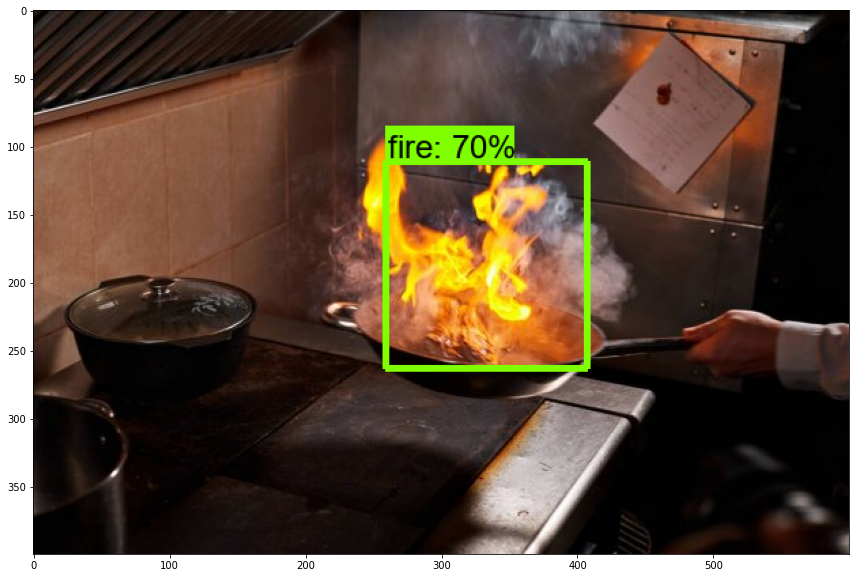

In [35]:
inference_with_plot(['C:/Users/Mosa-T/Desktop/content/workspace/data/test.record/image_39.jpg'])
#if it doesn't plot then remove %matlabplot inline, run cell and add it back, run again 

In [17]:
#from google.colab import drive

#drive.mount('/content/gdrive')

In [18]:
#!zip -r /content/file.zip /content/workspace

In [19]:
#cp /content/file.zip /content/gdrive/MyDrive/

# MAIN EVENT


In [ ]:
#real time detection
import cv2
import numpy as np
import time
start_time = time.time()

frames = []

DELAY_SECONDS = 5
box_th = 0.25
nms_th = 0.5
cap = cv2.VideoCapture(-1)
cap.read()
#cap = cv2.VideoCapture('C:/Users/Mosa-T/Desktop/content/workspace/data/test.record/video1.mp4')
cap = cv2.VideoCapture(0)
#cap.set(3, 1920)
#cap.set(4, 1080)
#cap.set(3, 640)
#cap.set(4, 480)
#cap.set(3, 640)
#cap.set(4, 640)
i=0
while True:
    i+=1
    _,img = cap.read()
    image_np_with_detections = img.copy()
    
    #if not i == 100:
        #cv2.imshow('object_detection',img)
        #key=cv2.waitKey(1)
        #if key == ord('q'):
        #    break
        #continue
    #image_np=cv2.resize(img, (640, 640))
    image_np=img.copy()
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    #if np.all(detections['detection_boxes'] == 0):
    #    cv2.imshow('object detection', cv2.resize(image_np, (640, 640)))
    #    key=cv2.waitKey(1)
    #    if key == ord('q'):
    #        break
    #    continue
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy() for key, value in detections.items()}
    detections['num_detections'] = num_detections
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=10,
            min_score_thresh=box_th,
            agnostic_mode=False,
            line_thickness=5)
    
    if np.all(len(detections['detection_classes'])):
        print("FIRE!")
    # Display output

    #frames.append(image_np_with_detections)
    #if time.time() - start_time > DELAY_SECONDS:
        #cv2.imshow("object detection", frames.pop(0))
        ###########################################################################################
    #cv2.imshow('object detection', cv2.resize(image_np_with_detections, (640, 640)))
    cv2.imshow('object detection',image_np_with_detections)
    
 
    key=cv2.waitKey(1000)
    if key == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

NameError: name 'tf' is not defined

In [ ]:
!pip install mmcv

In [90]:
#downloaded video fire detection
import numpy as np
import mmcv, cv2
from PIL import Image, ImageDraw
from IPython import display


video = mmcv.VideoReader('C:/Users/Mosa-T/Desktop/content/workspace/data/test.record/output.mp4')
#frames = [Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)) for frame in video]
frames = [(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)) for frame in video]

frames_tracked = []
for i, frame in enumerate(frames):
    print('\rTracking frame,press q to stop detection: {}'.format(i + 1), end='')

    input_tensor = tf.convert_to_tensor(np.expand_dims(frame, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy() for key, value in detections.items()}
    detections['num_detections'] = num_detections
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = frame.copy()
   
    viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=200,
            min_score_thresh=0.25,
            agnostic_mode=False,
            line_thickness=5)
    
    frame_draw = image_np_with_detections.copy()
    key=cv2.waitKey(1)
    if key == ord('q'):
        break
    frames_tracked.append(frame_draw)
print('\nDone') 
cv2.destroyAllWindows() 

Tracking frame,press q to stop detection: 27

KeyboardInterrupt: 

In [77]:
#save detection video
dim = Image.fromarray(frames_tracked[0]).size
fourcc = cv2.VideoWriter_fourcc(*'FMP4')    
video_tracked = cv2.VideoWriter('video_tracked5.mp4', fourcc, 25.0, dim)
for frame in frames_tracked:
    video_tracked.write(cv2.cvtColor(np.array(frame), cv2.COLOR_RGB2BGR))
video_tracked.release()

In [78]:
#Play saved video
import cv2
import numpy as np

cap = cv2.VideoCapture('C:/Users/Mosa-T/Desktop/content/video_tracked5.mp4')
   
# Check if camera opened successfully
if (cap.isOpened()== False): 
    print("Error opening video  file")

#Read until video is completed
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == True:
        cv2.imshow('Frame', frame)
    else: 
        break
        
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break
#When everything done, release 
# the video capture object
cap.release()
   
# Closes all the frames
cv2.destroyAllWindows()

In [10]:
#webcam with delay
import cv2
import time

cap = cv2.VideoCapture(0)
print(cap.get(3))
print(cap.get(4))

start_time = time.time()

DELAY_SECONDS = 5
frames = []

DELAY_SECONDS = 5

while True:

    ret, frame = cap.read()
    frames.append(frame)

    if time.time() - start_time > DELAY_SECONDS:
        cv2.imshow("frame", frames.pop(0))

    key = cv2.waitKey(1)
    if key == ord('q'):
        break

cv2.destroyAllWindows() 


640.0
480.0


In [ ]:
#record and playback for webcam.
import numpy as np
import cv2

def rec():
    # record a video
    cap = cv2.VideoCapture(0)
    # Define the codec and create VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'FMP4')
    out = cv2.VideoWriter('output.mp4',fourcc, 30.0, (640,480))

    while(cap.isOpened()):
        ret, frame = cap.read()
        if ret==True:
            out.write(frame)
            cv2.imshow('frame',frame)
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
        else:
            break

    # Release everything if job is finished
    cap.release()
    out.release()

def playback():
    # play a video
    cap = cv2.VideoCapture('output.mp4')

    while(cap.isOpened()):
        ret, frame = cap.read()
        if ret:
            cv2.imshow('frame',frame)
        else:
            break
        if cv2.waitKey(30) & 0xFF == ord('q'):
            break

    cap.release()

# create empty window to process input

cv2.namedWindow('frame')
# main loop
while True:
    key = cv2.waitKey(10) 
    if key == ord('r'):
        rec()
    elif key == ord('p'):
        playback()
    elif key == ord('x'):
        # end main loop
        cv2.destroyAllWindows()

In [20]:
#trying multithreading for real-time 
from threading import Thread
import cv2, time
#'C:/Users/Mosa-T/Desktop/content/input.mp4'
class VideoStreamWidget(object):
    def __init__(self, src=0):
        self.capture = cv2.VideoCapture(src)
        # Start the thread to read frames from the video stream
        self.thread = Thread(target=self.update, args=())
        self.thread.daemon = True
        self.thread.start()

    def update(self):
        # Read the next frame from the stream in a different thread
        while True:
            #self.frame=framePred(self.frame)
            if self.capture.isOpened():
                (self.status, self.frame) = self.capture.read()
            time.sleep(.01)

    def show_frame(self):
        # Display frames in main program
        cv2.imshow('frame', self.frame)
        key = cv2.waitKey(1)
        if key == ord('q'):
            self.capture.release()
            cv2.destroyAllWindows()
            exit(1)

if __name__ == '__main__':
    video_stream_widget = VideoStreamWidget()
    while True:
        try:
            video_stream_widget.show_frame()
        except AttributeError:
            pass


KeyboardInterrupt: 

In [ ]:
#trying multithreading for real-time  TEEEEEEMPPPPPPPPPPPPPPPPPP
from threading import Thread
import cv2, time
#'C:/Users/Mosa-T/Desktop/content/input.mp4'
class VideoStreamWidget(object):
    def __init__(self, src=0):
        self.capture = cv2.VideoCapture(src)
        # Start the thread to read frames from the video stream
        self.thread = Thread(target=self.show_frame, args=())
        self.thread.daemon = True
        self.thread.start()
        (self.status, self.frame) = self.capture.read()
        self.thread2 = Thread(target=self.framePred,args=())
        self.thread2.daemon = False
        self.thread2.start()
        
        
    def framePred(self):
        while self.status:
            image_np=self.frame.copy()
            input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
            image, shapes = detection_model.preprocess(input_tensor)
            prediction_dict = detection_model.predict(image, shapes)
            detections = detection_model.postprocess(prediction_dict, shapes)
            #detections = detect_fn(input_tensor)
            num_detections = int(detections.pop('num_detections'))
            detections = {key: value[0, :num_detections].numpy() for key, value in detections.items()}
            detections['num_detections'] = num_detections
            detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

            label_id_offset = 1
            image_np_with_detections = image_np.copy()

            viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=10,
                min_score_thresh=0.25,
                agnostic_mode=False,
                line_thickness=5)
            self.frame = image_np_with_detections.copy()
            cv2.imshow('frame', self.frame)
    
            
    def show_frame(self):
        # Display frames in main program
        #cv2.imshow('frame', self.frame)
        while True:
            if self.capture.isOpened():
                (self.status, self.frame) = self.capture.read()
        time.sleep(.01)
        key = cv2.waitKey(1)
        if key == ord('q'):
            self.capture.release()
            cv2.destroyAllWindows()
            exit(1)

if __name__ == '__main__':
    video_stream_widget = VideoStreamWidget()
    while True:
        try:
            video_stream_widget.show_frame()
        except AttributeError:
            pass


Exception in thread Thread-13:
Traceback (most recent call last):
  File "C:\Users\Mosa-T\anaconda3\envs\aaaaaaaaa\lib\threading.py", line 932, in _bootstrap_inner
    self.run()
  File "C:\Users\Mosa-T\anaconda3\envs\aaaaaaaaa\lib\threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-37-f33de51a2e94>", line 54, in show_frame
cv2.error: OpenCV(4.5.3) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-q3d_8t8e\opencv\modules\videoio\src\cap_msmf.cpp:427: error: (-215:Assertion failed) videoSample in function '`anonymous-namespace'::SourceReaderCB::Wait'



In [92]:
#downloaded video fire detection
import numpy as np
import mmcv, cv2
from PIL import Image, ImageDraw
from IPython import display


video = mmcv.VideoReader('C:/Users/Mosa-T/Desktop/content/workspace/data/test.record/output.mp4')
#video = mmcv.VideoReader(0)

#frames = [Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)) for frame in video]
frames = [(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)) for frame in video]

frames_tracked = []
for i, frame in enumerate(frames):
    print('\rTracking frame,press q to stop detection: {}'.format(i + 1), end='')

    input_tensor = tf.convert_to_tensor(np.expand_dims(frame, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy() for key, value in detections.items()}
    detections['num_detections'] = num_detections
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = frame.copy()
   
    viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=200,
            min_score_thresh=0.25,
            agnostic_mode=False,
            line_thickness=2)
    
    frame_draw = image_np_with_detections.copy()
    key=cv2.waitKey(1)
    if key == ord('q'):
        break
    #frames_tracked.append(frame_draw)
    cv2.imshow('detection fire',cv2.cvtColor(np.array(frame_draw), cv2.COLOR_RGB2BGR))
print('\nDone') 
cv2.destroyAllWindows() 

Tracking frame,press q to stop detection: 69
Done


In [17]:
import cv2 as cv
import time
import subprocess as sp
import multiprocessing as mp
#mp = mp.set_start_method('fork')
#import multiprocess as mp
from os import remove

In [22]:
!pip install multiprocess

In [17]:
def framePred(img):
    image_np=img.copy()
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy() for key, value in detections.items()}
    detections['num_detections'] = num_detections
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=10,
            min_score_thresh=0.25,
            agnostic_mode=False,
            line_thickness=5)
    return image_np_with_detections

In [19]:
def get_video_frame_details(file_name):
    cv2video = cv.VideoCapture(file_name)
    height = cv2video.get(cv.CAP_PROP_FRAME_HEIGHT)
    width  = cv2video.get(cv.CAP_PROP_FRAME_WIDTH) 
    framecount = cv2video.get(cv.CAP_PROP_FRAME_COUNT ) 
    return width,height,framecount

In [20]:
import multiprocessing as mp
mp.cpu_count()

12

In [78]:
def process_video():
    # Read video file
    cap = cv.VideoCapture(file_name)

    # get height, width and frame count of the video
    width, height = (
            int(cap.get(cv.CAP_PROP_FRAME_WIDTH)),
            int(cap.get(cv.CAP_PROP_FRAME_HEIGHT))
        )
    fps = int(cap.get(cv.CAP_PROP_FPS))

    # Define the codec and create VideoWriter object
    fourcc = cv.VideoWriter_fourcc(*'FMP4')
    out = cv.VideoWriter()
    output_file_name = "output_single.mp4"
    out.open(output_file_name, fourcc, fps, (width, height), True)

    try:
        while cap.isOpened():
            ret, frame = cap.read()
            #print(ret)
            if not ret:
                break
            im = frame
            # Perform face detection of frame
            im = framePred(im)
            #print(ret)
            # write the frame
            out.write(im)
    except:
        # Release resources
        cap.release()
        out.release()
        

    # Release resources
    cap.release()
    out.release()

In [80]:
def single_process():
    print("Video processing using single process...")
    start_time = time.time()
    process_video()
    end_time = time.time()
    total_processing_time = end_time - start_time
    print("Time taken: {}".format(total_processing_time))
    print("FPS : {}".format(frame_count/total_processing_time))
    
file_name = "C:/Users/Mosa-T/Desktop/content/input.mp4"
output_file_name = "output_single.mp4"
width, height, frame_count = get_video_frame_details(file_name)
print("Video frame count = {}".format(frame_count))
print("Width = {}, Height = {}".format(width, height))
single_process()

Video frame count = 680.0
Width = 640.0, Height = 480.0
Video processing using single process...
Time taken: 240.58338022232056
FPS : 2.8264629060063053


In [21]:
def process_video_multiprocessing(group_number):
    # Read video file
    cap = cv.VideoCapture(file_name)

    cap.set(cv.CAP_PROP_POS_FRAMES, frame_jump_unit * group_number)

    # get height, width and frame count of the video
    width, height = (
            int(cap.get(cv.CAP_PROP_FRAME_WIDTH)),
            int(cap.get(cv.CAP_PROP_FRAME_HEIGHT))
        )
    no_of_frames = int(cap.get(cv.CAP_PROP_FRAME_COUNT))
    fps = int(cap.get(cv.CAP_PROP_FPS))
    proc_frames = 0

    # Define the codec and create VideoWriter object
    fourcc = cv.VideoWriter_fourcc(*'FMP4')
    out = cv.VideoWriter()
    output_file_name = "output_multi.mp4"
    out.open("output_{}.mp4".format(group_number), fourcc, fps, (width, height), True)
    try:
        while proc_frames < frame_jump_unit:
            ret, frame = cap.read()
            if not ret:
                break

            im = frame
            # Perform face detection on each frame
            #im = framePred(im).copy()
            # Loop through list (if empty this will be skipped) and overlay green bboxes
            
            # write the frame
            out.write(im)

            proc_frames += 1
    except:
        # Release resources
        cap.release()
        out.release()

    # Release resources
    cap.release()
    out.release()

In [22]:
def combine_output_files(num_processes):
    # Create a list of output files and store the file names in a txt file
    list_of_output_files = ["output_{}.mp4".format(i) for i in range(num_processes)]
    with open("list_of_output_files.txt", "w") as f:
        for t in list_of_output_files:
            f.write("file {} \n".format(t))

    # use ffmpeg to combine the video output files
    ffmpeg_cmd = "ffmpeg -y -loglevel error -f concat -safe 0 -i list_of_output_files.txt -vcodec copy " + output_file_name
    sp.Popen(ffmpeg_cmd, shell=True).wait()

    # Remove the temperory output files
    for f in list_of_output_files:
        remove(f)
    remove("list_of_output_files.txt")

In [23]:
#def multi_process():
#    print("Video processing using {} processes...".format(num_processes))
#    start_time = time.time()
#    print('aa')
#    # Paralle the execution of a function across multiple input values
#    p = mp.Pool(num_processes)
#    print('aaa')
#    print(num_processes)
#    p.map(process_video_multiprocessing, range(num_processes))
#    print('b')
#    combine_output_files(num_processes)
#    print('c')
#    end_time = time.time()
   
#    total_processing_time = end_time - start_time
#    print("Time taken: {}".format(total_processing_time))
#    print("FPS : {}".format(frame_count/total_processing_time))

file_name = "input.mp4"
output_file_name = "output.mp4"
width, height, frame_count = get_video_frame_details(file_name)
print("Video frame count = {}".format(frame_count))
print("Width = {}, Height = {}".format(width, height))
num_processes = mp.cpu_count()
print("Number of CPU: " + str(num_processes))
frame_jump_unit =  frame_count// num_processes
#multi_process()

Video frame count = 680.0
Width = 640.0, Height = 480.0
Number of CPU: 12


In [24]:
if __name__ == '__main__':
    mp = mp.set_start_method('spawn')
    print("Video processing using {} processes...".format(num_processes))
    start_time = time.time()
    # Paralle the execution of a function across multiple input values
    p = mp.Pool(num_processes)
    p.map(process_video_multiprocessing, range(num_processes))
    print('b')
    combine_output_files(num_processes)
    end_time = time.time()
    
    total_processing_time = end_time - start_time
    print("Time taken: {}".format(total_processing_time))
    print("FPS : {}".format(frame_count/total_processing_time))

RuntimeError: context has already been set

In [52]:
 def inference_with_plot2(image_np, box_th=0.25):
        image_np = np.array(image_np)
        
        input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
        detections = detect_fn(input_tensor)

        # All outputs are batches tensors.
        # Convert to numpy arrays, and take index [0] to remove the batch dimension.
        # We're only interested in the first num_detections.
        num_detections = int(detections.pop('num_detections'))
        detections = {key: value[0, :num_detections].numpy()
                      for key, value in detections.items()}
        
        detections['num_detections'] = num_detections

        # detection_classes should be ints.
        detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

        label_id_offset = 1
        image_np_with_detections = image_np.copy()

        viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=200,
                min_score_thresh=box_th,
                agnostic_mode=False,
                line_thickness=5)

        #plt.figure(figsize=(15,10))
        return image_np_with_detections
        #print('Done')
        #plt.show();

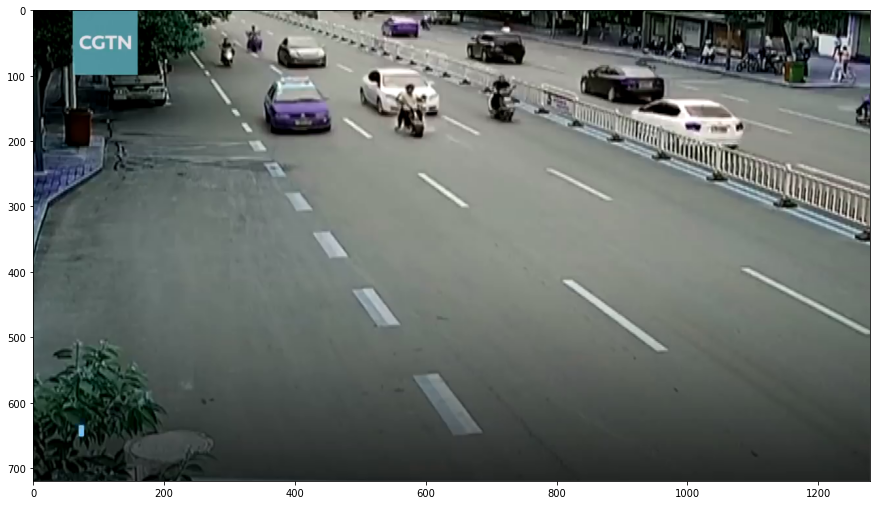

KeyboardInterrupt: 

In [60]:
#real time detection
import cv2
import numpy as np

box_th = 0.25
nms_th = 0.5
cap = cv2.VideoCapture(-1)
cap.read()
cap = cv2.VideoCapture('C:/Users/Mosa-T/Desktop/content/workspace/data/test.record/video1.mp4')
#cap = cv2.VideoCapture(0)
cap.set(3, 640)
cap.set(4, 640)
flag=False
plt.figure(figsize=(15,10))
while True:
    _,img = cap.read()
    image_np_with_detections = img.copy()
    if not flag:
        a = plt.imshow(inference_with_plot2(image_np_with_detections))
        flag = True
        continue
    #plt.imshow(cv2.cvtColor(inF[index],cv2.COLOR_BGR2RGB))
    a.set_data(inference_with_plot2(image_np_with_detections))
    plt.pause(0.0005)
    plt.show()
    key=cv2.waitKey(1)
    if key == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

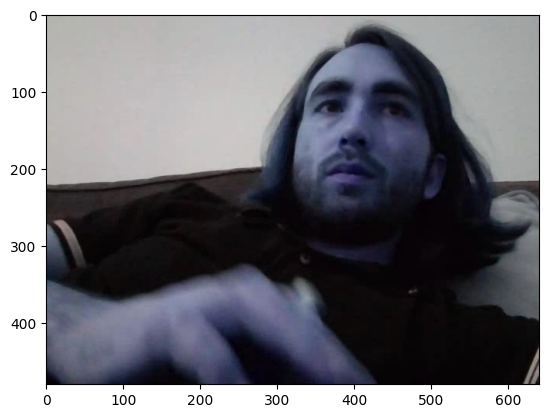

In [ ]:
import cv2
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import skvideo.io
#ffmpeg_path = "C:/Users/Mosa-T/anaconda3/envs/aaaaaaaaa/conda-meta/ffmpeg-4.2.2-he774522_0"
#skvideo.setFFmpegPath(ffmpeg_path)
#from moviepy.editor import VideoFileClip
from matplotlib.widgets import Slider
#clip = VideoFileClip('input.mp4')
index =1
inF=skvideo.io.vread('input.mp4')


#inF=[]
#for frames in clip.iter_frames():
 #   inF.append(frames)

#global inF


def grab_frame():
    #print(index)
    frame = inF[index]
    return cv2.cvtColor(inF[index],cv2.COLOR_BGR2RGB)

#Initiate the two cameras
#cap1 = clip
#create two subplots
fig,ax1 = plt.subplots(1,1)

#create two image plots
im1 = ax1.imshow(grab_frame())

def update(i):
    global index
    im1.set_data(grab_frame())
    index+=1


ani = FuncAnimation(plt.gcf(), update, interval=10)
plt.show()
#a=plt.imshow(cv2.cvtColor(inF[index],cv2.COLOR_BGR2RGB))
#while index < 1265:
  #a=plt.imshow(cv2.cvtColor(inF[index],cv2.COLOR_BGR2RGB))
#  index+=1
  #fig.canvas.draw_idle()
  #fig.show()
#  a=plt.imshow(cv2.cvtColor(inF[index],cv2.COLOR_BGR2RGB))
  #a.set_data(cv2.cvtColor(inF[index],cv2.COLOR_BGR2RGB))
#  plt.pause(0.0005)
#  a.remove()
  #im1 = ax1.imshow(grab_frame())
  #plt.show()
  #plt.remove()
#fig.show()
#print('done')

In [ ]:
!pip install scikit-video

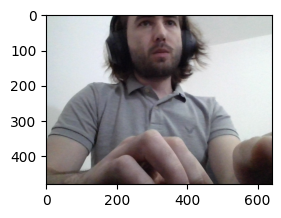

In [ ]:
import cv2
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def grab_frame(cap):
    ret,frame = cap.read()
    return cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)

#Initiate the two cameras
cap1 = cv2.VideoCapture(0)
#cap2 = cv2.VideoCapture('input.mp4')

#create two subplots
ax1 = plt.subplot(1,2,1)
#ax2 = plt.subplot(1,2,2)

#create two image plots
im1 = ax1.imshow(grab_frame(cap1))
#im2 = ax2.imshow(grab_frame(cap2))

def update(i):
    im1.set_data(grab_frame(cap1))
    im2.set_data(grab_frame(cap2))


ani = FuncAnimation(plt.gcf(), update, interval=10)
plt.show()